In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\Ashutosh Thakur\Desktop\ML tuts\Dataset\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

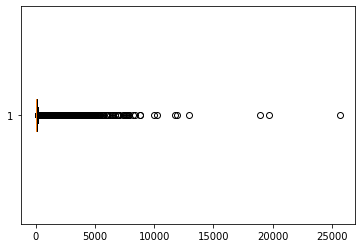

In [7]:
plt.boxplot(df['Amount'],vert = False)
plt.show()

In [8]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

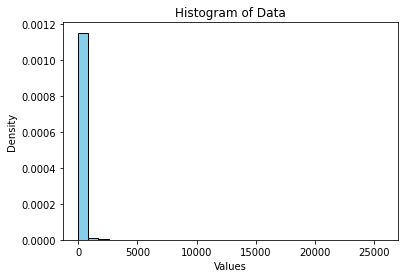

In [13]:
plt.hist(df['Amount'], bins=30, density=True, color='skyblue', edgecolor='black')
plt.title('Histogram of Data')
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['normAmount'] = scaler.fit_transform(np.array(df['Amount']).reshape(-1, 1))
df['normAmount']

0         0.244964
1        -0.342475
2         1.160686
3         0.140534
4        -0.073403
            ...   
284802   -0.350151
284803   -0.254117
284804   -0.081839
284805   -0.313249
284806    0.514355
Name: normAmount, Length: 284807, dtype: float64

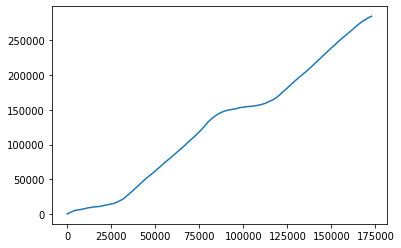

In [17]:
plt.plot(df['Time'],df.index)

In [18]:
df.drop(['Time','Amount'],axis =1, inplace = True)

In [19]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test = train_test_split(df.drop(['Class'],axis = 1), df['Class'], test_size = 0.3, random_state = 0)

In [23]:
x_train.shape

(199364, 29)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

Without any oversampling method

In [26]:
model = LogisticRegression()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(metrics.accuracy_score(y_test,predictions))

0.999204147794436


In [28]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.88      0.62      0.73       147

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [29]:
print(metrics.confusion_matrix(y_test,predictions))

[[85284    12]
 [   56    91]]


Accuracy is near about 100 % but the recall of the minority class in very less. It proves that the model is more biased towards majority class. So, it proves that this is not the best model. Now, we will apply different imbalanced data handling techniques and see their accuracy and recall results.

Applying smote oversampling technique

In [30]:
y_train.value_counts()

0    199019
1       345
Name: Class, dtype: int64

In [31]:
from imblearn.over_sampling import SMOTE 

In [35]:
sm = SMOTE(random_state=2)
x_train_smote, y_train_smote = sm.fit_resample(x_train, y_train)

In [36]:
y_train_smote.value_counts()

0    199019
1    199019
Name: Class, dtype: int64

In [37]:
model = LogisticRegression()
model.fit(x_train_smote,y_train_smote)
predictions = model.predict(x_test)
print(metrics.accuracy_score(y_test,predictions))

0.9752583593740857


In [38]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.06      0.92      0.11       147

    accuracy                           0.98     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.98      0.99     85443



In [39]:
print(metrics.confusion_matrix(y_test,predictions))

[[83194  2102]
 [   12   135]]


We have reduced the accuracy to 98% as compared to previous model but the recall value of minority class has also improved to 92 %. This is a good model compared to the previous one. Recall is great. Now, we will apply NearMiss technique to Under-sample the majority class and see its accuracy and recall results.

In [40]:
from imblearn.under_sampling import NearMiss 
nr = NearMiss() 

In [42]:
x_train_miss, y_train_miss = nr.fit_resample(x_train, y_train) 

In [44]:
y_train_miss.value_counts()

0    345
1    345
Name: Class, dtype: int64

In [48]:
model = LogisticRegression() 
model.fit(x_train_miss, y_train_miss )  
predictions = model.predict(x_test) 
  
# print classification report 
print(metrics.classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       1.00      0.55      0.71     85296
           1       0.00      0.95      0.01       147

    accuracy                           0.56     85443
   macro avg       0.50      0.75      0.36     85443
weighted avg       1.00      0.56      0.71     85443



This model is better than the first model because it classifies better and also the recall value of minority class is 95 %. But due to undersampling of majority class, its recall has decreased to 56 %. So in this case, SMOTE is giving me a great accuracy and recall

Now applying RobustScaler instead of StandardScaler and checking if there are any changes in results after applying smote

In [49]:
df = pd.read_csv(r"C:\Users\Ashutosh Thakur\Desktop\ML tuts\Dataset\creditcard.csv")

In [50]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df['normAmount'] = scaler.fit_transform(np.array(df['Amount']).reshape(-1, 1))
df['normAmount']

0         1.783274
1        -0.269825
2         4.983721
3         1.418291
4         0.670579
            ...   
284802   -0.296653
284803    0.038986
284804    0.641096
284805   -0.167680
284806    2.724796
Name: normAmount, Length: 284807, dtype: float64

In [51]:
df.drop(['Time','Amount'],axis =1, inplace = True)

In [52]:
x_train,x_test,y_train,y_test = train_test_split(df.drop(['Class'],axis = 1), df['Class'], test_size = 0.3, random_state = 0)

In [53]:
sm = SMOTE(random_state=2)
x_train_smote, y_train_smote = sm.fit_resample(x_train, y_train)

In [54]:
y_train_smote.value_counts()

0    199019
1    199019
Name: Class, dtype: int64

In [55]:
model = LogisticRegression()
model.fit(x_train_smote,y_train_smote)
predictions = model.predict(x_test)
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.06      0.92      0.11       147

    accuracy                           0.98     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.98      0.99     85443

